# PiBlocks shows a fun way to compute digits of $\pi$ using collisions

## If you haven't already seen the video...

Start by checking out 3Blue1Brown's video [The Most Unexpected Answer to a Counting Puzzle](https://www.youtube.com/watch?v=HEfHFsfGXjs)

## But wait, there's more!

3Blue1Brown has a few follow-up videos on his channel showing solutions to the problem.

There are many ways to prove that the number of elastic collisions between two masses on a frictionless plane given the ratio of the masses is $\frac{m_2}{m_1}=100^{k-1}, k\in {\mathbb{N}}_1$

## Let's simulate this first (and prove it with math later)

To make this simulation as simple as possible, there is no time or position component needed. **This means we only need to model the collision dynamics! (You'll see it works in the next section).** This is justifiable because the frictionless assumption means that nothing interesting will happen between collisions. Also, even if the blocks are super close to one another, there is still an infinite precision in distance between them and collisions are perfectly elactic (so no matter how close they get, if you zoom in close enough you'll see that even super fast collisions in close proximity have the same properties as slower ones from farther distances).

### Word to the wise - this simulation has exponential time complexity $O(10^k)$ (the number of times the loop runs increases by a factor of $10$ each time you increment $k$ by $1$). Keep $k$ between $1$ and $7$ so as not to inadvertently break anything. I did not add code to protect against this.

**How to use this Notebook:** If you're new to iPython, Jupyter Notebooks, and Binder, a few comments may be helpful here... The file you're looking at was written as a combination of Python, Markdown, LaTeX, and is saved as something called an iPython Notebook (.ipynb). If you're seeing this page, you followed a link I gave you and clicked on the associated .ipynb. The Notebook format is the brainchild of Project Jupyter, and the Binder project lets you view Notebooks interactively using a tiny chunk of free server space you had allocated to you when you opened this file. Binder is what makes this experience interactive (thank you Binder!). As you follow along, you'll see results pre-populated from the last time I ran this before I posted it online. You can run your own experiments by clicking on each line of code (one by one, starting from the top), then clicking the Run button near the top of the page. There are some really nice people out there paying for our ability to use this server space for free, so please be kind and close this page as soon as you're not actively looking at it (this frees up the resources to other Binder users) - you can always come back and run this again! The open source community thanks you =)

***(Step 1)*** First, we'll need a few tools from numpy.

In [1]:
from numpy import array, matmul

**(Step 2)** Next, we want to select a $k$ for this experiment (which is identical to specifying how many digits of $\pi$ we want to calculate)

In [2]:
k = 3

**(Step 3)** Now let's set the masses and velocities $m_1, m_2, v_1, v_2$. $m_1$ is a unit mass, $m_2$ is then $100^{k-1}$ times larger than the unit mass. Mass 1 is the one that lies between Mass 2 and the wall, and its initial velocity is $0$. The wall is the leftmost object (just based on the way I chose to set up this problem), and leftward motion corresponds to negative velocity while rightward motion means positive velocity. Thus, Mass 2 is initialized with unit negative velocity (but you can change this to any negative velocity without impacting the final result (meaning total number of collisions)).

In [3]:
v1, v2, m1, m2 = 0, -1, 1, 100**(k-1)

**(Step 4)** Now we're going to work from the fundamental [physics modeling our elastic collisions](https://en.wikipedia.org/wiki/Elastic_collision#One-dimensional_Newtonian). You'll find these equations on Wikipedia. Let's reformulate these equations using matrices. The A matrix models the collisions, and the B matrix corresponds to Mass 1 bouncing off the wall (since it simply reflects the velocity of Mass 1 from negative to positive).

$A = \begin{bmatrix}\frac{m_1-m_2}{m_1+m_2}& \frac{2 m_2}{m_1+m_2}\\ \frac{2 m_1}{m_1+m_2}&\frac{m_2-m_1}{m_1+m_2}\end{bmatrix},  B = \begin{bmatrix}-1&0\\ 0&1\end{bmatrix}, v = \begin{bmatrix}v_1\\v_2\end{bmatrix}, u = \begin{bmatrix}u_1\\u_2\end{bmatrix}$

In [4]:
A = array([[(m1-m2),(2*m2)],[(2*m1),(m2-m1)]])/(m1+m2)
B = array([[-1,0],[0,1]])

**(Step 5)** There are no collisions at the outset of this experiment, so let's initialize the collisions counter to $0$.

In [5]:
collisions = 0

**(Step 6)** Here is the meat of the simulation. What you'll see is a while loop, and the loop will keep running over and over again (incrementing the collisions counter by $+1$ each time) until the "exit conditions" are reached. The exit conditions simply state that Mass 1 and Mass 2 are both moving away from the wall, and Mass 2 must be moving at least as fast as Mass 1 so the masses themselves will never collide with each other or with the wall again. Additionally, because Mass 1 has an initial velocity of 0, and Mass 2 has some initial negative velocity, the first collision will always happen between Mass 2 and Mass 1 (so the $A$ matrix models the result of this collision as $v = Au$). You'll notice from the problem statement that Mass 1 and Mass 2 will never collide twice back-to-back. Because of this, after a Mass 1 Mass 2 collision, there will either be a collision with the wall or no collisions will ever happen again. Similarly, when Mass 1 will never collide with the wall twice in a row. After Mass 1 hits the wall (modeled as $v = Bu$), it will either collide with Mass 2 or no collisions will happen ever again. So we get this toggling action between the $A$ matrix and $B$ matrix. Very conveniently, the $A$ matrix models all odd numbered collisions, and the $B$ matrix models all even numbered collisions. The code selects this by using the modulo operation (%) which gives the remainder of an integer division (in our case, we mod by $2$, giving either $0$ or $1$ as the result which tells us whether we should model the next collision using the $A$ or $B$ matrix).

A few notes on the implementation: in Python, the first element of an array has index $0$. We originally implicitly defined $v_1, v_2$ as "number" types, which are scalars. In order to use our $A$ and $B$ matrices, we use the $array()$ function so that we can leverage matrix multiplication functionality with $matmul()$. After this, the results $v[0]$ and $v[1]$ have "array" types, but we want them to be scalars (so as not to break the code - the while loop expects scalar "number" types when evaluating the exit conditions). The $float()$ operator does something called "casting" where the array type is changed to a scalar "float" type. If you're unfamiliar with casting, the intuition behind it is fairly straightforward. A quick google search should clear this up if you're not comfortable with what's going on in the code below.

In [6]:
while not((v1>=0)&(v2>=0)&(v2>=v1)):
    v = array([[v1],[v2]])
    if (collisions%2)<1:
        v = matmul(A,v)
    else:
        v = matmul(B,v)
    v1, v2 = float(v[0]), float(v[1])
    collisions += 1

**(Step 7)** Now that the simulation is done, we just need to print the result. As expected, we get $k$ digits of pi. More specifically, $\pi \approx \frac{collisions}{10^{(k-1)}}$

In [7]:
print(collisions)

314


### We did it! The above line of code shows that digits of $\pi$ fall out of our simulation, which agrees with our expectations.

#### That can be the end of it - if you want. We just verified the theoretical result. However... we didn't *prove (analytically)* it is always true. Fellow math nerds, please stay tuned.

If you're anything like my friend and I, you might feel like you've come away from this simulation with more questions than answers. Let's take a few moments to gain some insight behind what just happened...

For the sake of getting this code online ASAP (it's a work night for me - I'll make this prettier, I promise!), I left a bunch of comments in the code.

The basic idea is that we want to inspect the Kinetic Energy (K.E.) equation $\frac{1}{2} m_1 v_1^2 + \frac{1}{2} m_2 v_2^2 = const.$

The K.E. equation implicitly defines an ellipse, but if you make the substitution $v_1 = \frac{(m_1)}{(2*C)}\tilde{v_1}$ $v_2 = \frac{(m_2)}{(2*C)}\tilde{v_2}$, something interesting happens.

This choice implies $\tilde{v_1}^2 + \tilde{v_2}^2 = 1$, which is the equation for the unit circle! *(foreshadowing intended)*

#### The following code block should be run once (or again to reset the plots thereafter).

This will generate and display the plots corresponding to:

Our ellipse (on the left):
$\frac{1}{2} m_1 v_1^2 + \frac{1}{2} m_2 v_2^2 = const.$

and our unit circle (on the right):
$\tilde{v_1}^2 + \tilde{v_2}^2 = 1$

(run this code block twice if you don't see any plots the first time)

(-1.09999999989, 1.09999999989, -1.099982834359373, 1.099982834359373)

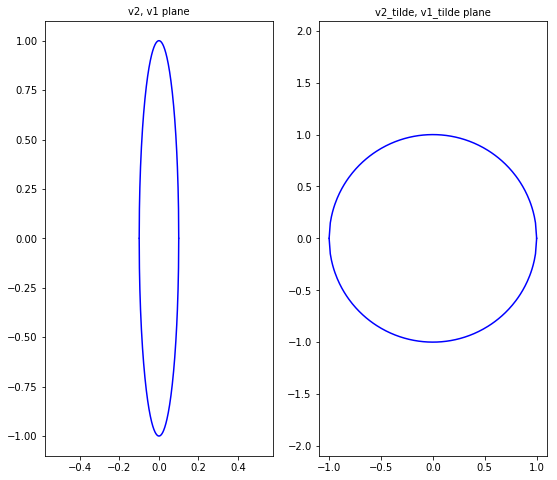

In [67]:
from numpy import sqrt, linspace
import matplotlib.pyplot as plt

collisions = 0 # resetting this prior to the next code block

"""
Let's re-define our variables from above. Run this code block one time. 
Any code below this block can be "reset" by running this line of code again.
"""
k = 2
v1, v2, m1, m2 = 0, -1, 1, 100**(k-1)
A = array([[(m1-m2),(2*m2)],[(2*m1),(m2-m1)]])/(m1+m2)
B = array([[-1,0],[0,1]])

"""
The epsilon definition below is just a band-aid against a numeric error I was getting during plotting.
The exact issue is that linspace almost negligibly spills outside of the bounds we define,
but this ultimately leads to the innards of a sqrt() function to become slightly negative,
which results in the emergence of complex numbers, which doesn't play nicely with the plot the way we intend to use it.
Don't believe me? set epsilon=0 and k=2. 
This should plot a closed conic section but you'll see gaps near each side (and that python throws a warning message).
"""
epsilon = 10**(-10)

"""
The total kinetic energy of the system remains constant. This means K.E. = const., which we calculate on the next line of code.
This equation implicitly defines an ellipse, which will be plotted (below on the left) when you run this code block.
"""
C = (1/2)*(m1)*(v1)**2 + (1/2)*(v2)**2
v2_domain = sqrt(2*C/m2)*linspace(-1 + epsilon, 1 - epsilon, 180-1)
fig, axs = plt.subplots(1, 2, figsize=(9, 8))
axs[0].plot(v2_domain, sqrt(m2/m1)*sqrt(2*C/m2 - (v2_domain)**2), 'b', )
axs[0].plot(v2_domain, -sqrt(m2/m1)*sqrt(2*C/m2 - (v2_domain)**2), 'b', )
axs[0].set_title('v2, v1 plane', fontsize=10)
axs[0].axis('equal')


"""
We'll define a new coordinate system that maps the ellipse to a unit circle.
1 = (m1/(2*C))*v1**2 + (m2/(2C))*v2**2 = v1_tilde**2 + v2_tilde**2
"""
v2_tilde_domain = linspace(-1 + epsilon, 1 - epsilon, 180)
axs[1].plot(v2_tilde_domain, sqrt(1 - (v2_tilde_domain)**2), 'b', )
axs[1].plot(v2_tilde_domain, -sqrt(1 - (v2_tilde_domain)**2), 'b', )
axs[1].set_title('v2_tilde, v1_tilde plane', fontsize=10)
axs[1].axis('equal')

### Okay maybe circles and ellipses don't make it obvious where we're headed, but in the next code block things get much more interesting!

We have our simulation code modified slightly and copied below. Let's simulate each collision one-by-one and see what that looks like in $(v_2, v_1)$ (or equivalently $(\tilde{v_2}, \tilde{v_1})$) space

The collision model takes an ordered pair $(u_1, u_2)$ as an input and returns $(v_1, v_2)$ as an output. It makes sense to get an eye on how these points update from one collision to the next. If you run the below code block multiple times, you can watch the simulation evolve one collision at a time.

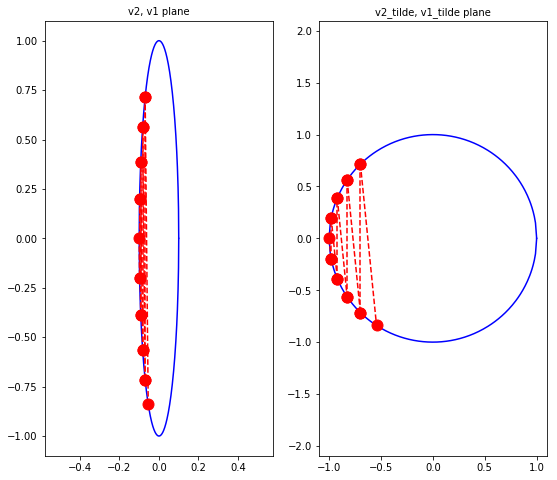

In [76]:
"""
Run this block multiple times to see it in action.
"""

if not((v1>=0)&(v2>=0)&(v2>=v1)):
    v = array([[v1],[v2]])
    if (collisions%2)<1:
        v = matmul(A,v)
    else:
        v = matmul(B,v)
    axs[0].plot(array([v2, float(v[1])])*sqrt(m1/m2)/(2*C),array([v1, float(v[0])])*sqrt(m1/m2)/(2*C), 'ro--', markersize='11')
    axs[1].plot(array([v2, float(v[1])]),array([v1, float(v[0])])*sqrt(m1/m2), 'ro--', markersize='11')
    v1, v2 = float(v[0]), float(v[1])
    collisions += 1
fig

In [78]:
print("The current number of collisions = " + str(collisions) + ". We set k = " + str(k) + \
      ", \nso we expect the number of collisions to stop increasing upon reaching the first " + str(k) + " digits of pi.")

The current number of collisions = 9. We set k = 2, 
so we expect the number of collisions to stop increasing upon reaching the first 2 digits of pi.


#### If you look closely at the normalized (circular) plot on the right, you'll notice that the slope of every {odd, even} line is identical. If you look even more closely you might notice that the distance between adjacent dots is constant, and if you look really, really closely, you'll realize that means adjacent dots sweep the same angular distance with respect to the origin. All of these details are super important in the analytical proof for our "pi from collisions problem". A TODO item for me will be to add code that shows the things I just said can be verified numerically. (This is an easy update). Other than that, my friend and I will refer you to our written mathematical proof. Keep an eye out for a link to the document (most likely via a shared link to one of our DropBox accounts). In the meanwhile, 3Blue1Brown has a few proofs that align closely with the plots we just created. His YouTube videos are always well worth the watch!

## There you have it! This Notebook was brought to you by Alex Augenstein and Rich Sofranko. Rich is finishing the write-up on our mathematical proof. I'll either re-create the results below or link to it in a public DropBox (or similar). Thanks for reading!